In [2]:
import pandas as pd

trumparchiveData = pd.read_csv("data/trumptwitterarchive/trumptwitterarchive.csv")

trumparchiveData.head()

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
0,Twitter for iPhone,947824196909961216,Will be leaving Florida for Washington (D.C.) ...,Mon Jan 01 13:37:52 +0000 2018,8237,NaN,51473,False
1,Twitter for iPhone,947810806430826496,Iran is failing at every level despite the ter...,Mon Jan 01 12:44:40 +0000 2018,14595,25073877.0,53557,False
2,Twitter for iPhone,947802588174577664,The United States has foolishly given Pakistan...,Mon Jan 01 12:12:00 +0000 2018,49566,NaN,138808,False
3,Twitter for iPhone,947614110082043904,HAPPY NEW YEAR! We are MAKING AMERICA GREAT AG...,Sun Dec 31 23:43:04 +0000 2017,35164,NaN,154769,False
4,Twitter for iPhone,947592785519173637,As our Country rapidly grows stronger and smar...,Sun Dec 31 22:18:20 +0000 2017,39428,NaN,157655,False


In [3]:
# clean the dataframe
# drop the source column, because we don't need it
trumparchiveData = trumparchiveData.drop(["source"], axis=1)

# rename the columns to match the columns of the kaggle dataset
trumparchiveData.columns = ["id", "content", "date", "retweets", "in_reply_to_user_id_str", "favorites", "is_retweet"]

# cleaned dataframe
trumparchiveData.head()

,id,content,date,retweets,in_reply_to_user_id_str,favorites,is_retweet
0,947824196909961216,Will be leaving Florida for Washington (D.C.) ...,Mon Jan 01 13:37:52 +0000 2018,8237,NaN,51473,False
1,947810806430826496,Iran is failing at every level despite the ter...,Mon Jan 01 12:44:40 +0000 2018,14595,25073877.0,53557,False
2,947802588174577664,The United States has foolishly given Pakistan...,Mon Jan 01 12:12:00 +0000 2018,49566,NaN,138808,False
3,947614110082043904,HAPPY NEW YEAR! We are MAKING AMERICA GREAT AG...,Sun Dec 31 23:43:04 +0000 2017,35164,NaN,154769,False
4,947592785519173637,As our Country rapidly grows stronger and smar...,Sun Dec 31 22:18:20 +0000 2017,39428,NaN,157655,False


In [4]:
# the shape of the dataframe
trumparchiveData.shape

(36307, 7)

In [5]:
kaggleData = pd.read_csv("data/kaggle/realdonaldtrump.csv")

kaggleData.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,501,879,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,33,271,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,12,20,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,10,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1373,1954,NaN,NaN


In [6]:
# clean the dataframe
# drop the link column, because we don't need it
kaggleData = kaggleData.drop(["link"], axis=1)

# the cleaned dataframe
kaggleData.head()

,id,content,date,retweets,favorites,mentions,hashtags
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,501,879,NaN,NaN
1,1701461182,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,33,271,NaN,NaN
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,12,20,NaN,NaN
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,10,26,NaN,NaN
4,1773561338,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1373,1954,NaN,NaN


In [7]:
kaggleData.shape

(42295, 7)

The format we wish for:

'id,content,date,max(retweets),max(likes),mentions,hashtags,in_reply_to_usr_id_string'

Let's merge to two dataframes with a left join and the kaggle dataset on the left side, since it's the bigger dataset.

In [8]:
merged_left = pd.merge(left=kaggleData, right=trumparchiveData, how='left', left_on='id', right_on='id')

# clean the merged dataframe
merged_left = merged_left.drop(["date_y", "content_y"], axis=1)

# get the maximum retweets and favorites count from the two datasets
max_retweets = []
max_favorites = []

for index, row in merged_left.iterrows():
    max_retweets.append(max(row['retweets_x'], row['retweets_y']))
    max_favorites.append(max(row['favorites_x'], row['favorites_y']))
    
merged_left['max_retweets'] = max_retweets
merged_left['max_favorites'] = max_favorites

merged_left.head()

,id,content_x,date_x,retweets_x,favorites_x,mentions,hashtags,retweets_y,in_reply_to_user_id_str,favorites_y,is_retweet,max_retweets,max_favorites
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,501,879,NaN,NaN,253.0,NaN,202.0,False,501.0,879.0
1,1701461182,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,33,271,NaN,NaN,2.0,NaN,3.0,False,33.0,271.0
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,12,20,NaN,NaN,3.0,NaN,2.0,False,12.0,20.0
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,10,26,NaN,NaN,8.0,NaN,27.0,False,10.0,27.0
4,1773561338,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1373,1954,NaN,NaN,1421.0,NaN,1950.0,False,1421.0,1954.0


In [9]:
merged_left = merged_left.drop(["retweets_x", "retweets_y", "favorites_x", "favorites_y"], axis=1)
merged_left.columns = ["id", "content", "date", "metions", "hashtags", "in_reply_to_user_id_str", "is_retweet", "retweets", "favorites"]


merged_left.head()

,id,content,date,metions,hashtags,in_reply_to_user_id_str,is_retweet,retweets,favorites
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,NaN,NaN,NaN,False,501.0,879.0
1,1701461182,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,NaN,NaN,NaN,False,33.0,271.0
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,NaN,NaN,NaN,False,12.0,20.0
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,NaN,NaN,NaN,False,10.0,27.0
4,1773561338,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,NaN,NaN,NaN,False,1421.0,1954.0


In [10]:
# Write DataFrame to CSV
merged_left.to_csv('data/merged.csv', index=False)

In [18]:
import nltk
from nltk.tag import StanfordNERTagger 
from nltk.tokenize import word_tokenize

st = StanfordNERTagger('lib/stanford-ner-4.0.0/classifiers/english.all.3class.distsim.crf.ser.gz','lib/stanford-ner-4.0.0/stanford-ner.jar',encoding='utf-8')

texts = merged_left["content"]

contentRange = range(1000,2000)

#for i in contentRange:
 #   tokenized_text = word_tokenize(texts[i])
  #  classified_text = st.tag(tokenized_text)
#
 #   print(texts[i])
  #  print(classified_text)
   # print("")


In [19]:
# pip install spacy
# python -m spacy download en_core_web_sm

import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

texts = merged_left["content"]

persons = ""

for i in contentRange:
    #print(texts[i])
    doc = nlp(texts[i])
    for entity in doc.ents:
        if(entity.label_ == "PERSON"):
           persons +=entity.text + " "
print(persons)

Eric Forbes Jesus Joe Biden Biden Tom Faith Obamacare Biden Barney Frank Biden Obama Russell Brand Katy Perry Michele Bachmann Rosie RonPaul Michele Bachmann Michele Newsmax- Michele Bachmann Caucus @ BarackObama Michele Bachmann Michelle Obama Diane Brady Bob Vander http://bit.ly/wscALx Obamacare Reagan Semper Fi Rosie O'Donnell's Rosie Faith Kickoff Obama-style Tim Tebow's Rick Perry him--- @ GovernorPerry Solyndra http://bit.ly/wNAfqb http://tl.gd/fh6mek Ivanka Tom Brokaw Mitt Romney "George Tom Solyndra Obama Sean Bella Santorum Mubarak http://bit.ly/xGcLot Lawrence Bill Carter/Sept.26 Lawrence O'Donnell http://c21.in/c21SBapp http://youtu.be/Y6HWdR_11EI Trump truth.http://bit.ly/x5J3Nx Bible Michael Cohen http://fxn.ws/x2D4xV http://bit.ly/zyzUSp Melania Trump Melania Trump Great Guy Fred C. Trump @FlaGovScott Greg Kelly Donald Trump Paul Teutul Sr. Jon Huntsman Robert Kiyosaki Midas Touch Lawrence Lawrence O'Donnell Whitney Houston Whitney Houston Jimmy Fallon Emanuel Cleaver VP 

Content Wordcloud


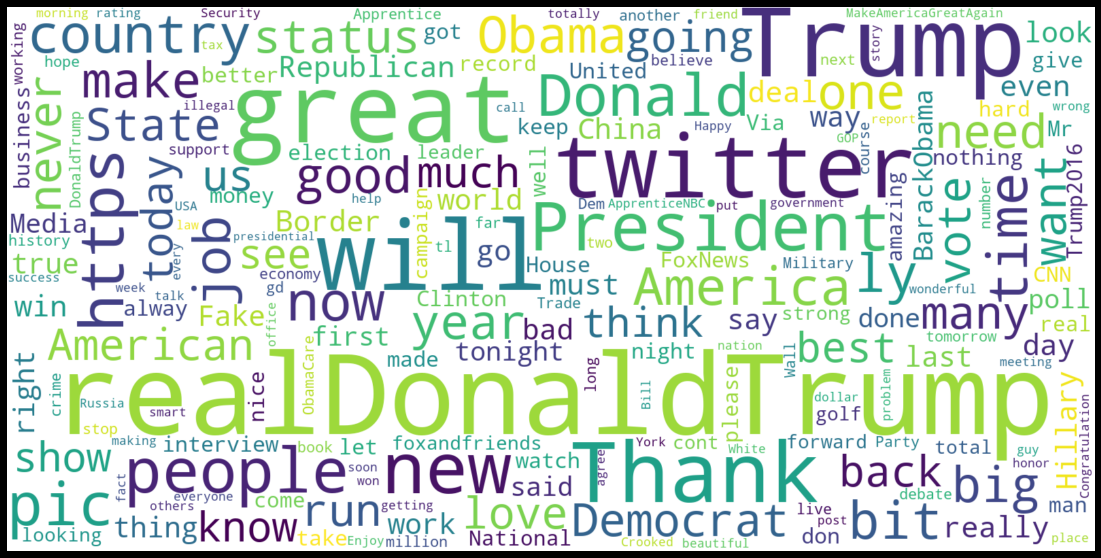

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("Content Wordcloud")

contenttext = ""

for t in texts:
    contenttext += t

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1600, height=800, collocations=False).generate(persons)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Hashtag Wordcloud


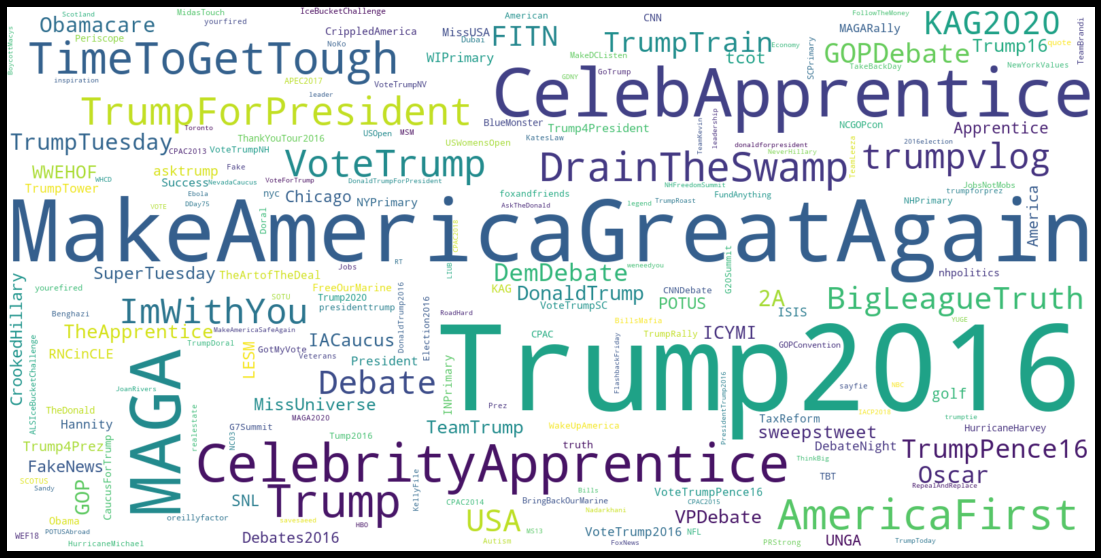

In [14]:
print("Hashtag Wordcloud")
texts = merged_left["hashtags"]

text = ""

for t in texts:
    hashtags = str(t)
    if hashtags != "nan":
        text += str(t)

text = text.replace(",","").replace("#", " #").replace("pic","").replace("http","")

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1600, height=800, collocations=False).generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()